# Capstone Project Analysis
__GDP and its relationship with Quality of Life__

With the indicator data collected, compiled and collapsed from the World Bank and Transparency International in our previous parts (Parts 1 & 2), we now have a dataset that gives us a glimpse into the quality of life and GDP values by country

__Our Dataset:__

The dataframe's four initial columns hold general data such as country name, world bank code, region, and income group. These are mandatory factors for each country and do not contain any null values.

The rest of the columns contain indicator data. The particular indicator is denoted by the column name. These can potentially contain null values, however, due to the collapsing of our data in the previous section, we hope that null values have been reduced.

__Goal:__

Our goal is to assess what indicators have a measurable impact on GDP or GDP per capita and build a model that can predict it effectively. 

As we are operating in an imperfect and unpredictable world, we expect there to be differences in the impact that countries will experience from each variable. Thus, our main aim is not to simply predict GDP, but assess and attain insight into what a possible model to estimate GDP would rely on as significant predictors.

__Metrics:__

As a measure of our effectiveness, we use both r2 scores and RMSE (Root mean squared error) to judge our models. A higher r2 score will take precedence, however, similar scores will be further weighted based on RMSE.

__Findings:__

We found that engaging in feature selection generally resulted in a less accurate model. This could be due to all variables playing a role in determining GDP, resulting in a loss of information as we eliminate features. This was particularly the case for our Random Forest and KNN models. 
Upon transforming our data with PCA, it was found that we were able to improve our model performance over our previous (Random Forest & KNN) models. PCA also allowed us to reduce our feature list from 16 to 7.

__Limitations:__

* Collapse of data: Due to the way in which we reduced the complexity of our data through collapsing of the timeseries (completed in part 2 of 3), we have overly simplified our data. It does not take into consideration seasonal, cyclical, and trend information. This doesn't mean that our results have no merit, however, it does mean that our model shouldn't be used as an accurate predictor of GDP per capita.
* Removal of outliers: A great deal of outliers exist in reality. Although we have kept a great deal of outliers to mimic actual conditions, we have eliminated extreme cases to make our model function better. 
* Imputation/Removal of nulls: We removed a number of observations that contained null values greater than 3 in our imputation phase (part 2 of 3)*

Assumption
If Imputation of greater than 20% values is required per row (greater than 3.6 missing values), an observation could result in being too artificial and reduce the efficacy or application of our model

*Dropped Haiti and all countries with greater than 3 missing values

### Import packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from __future__ import division
%matplotlib inline

### Import dataframe
Import our compiled dataframe from part 2

In [2]:
# Read csv in as data frame: df
df = pd.read_csv('./datasets/GDP_QOL_IMP_COM.csv')

In [3]:
# Show sum of null values by column in descending order
df.isnull().sum().sort_values(ascending=False)

Tech_Exports          0
Imp_San_Access        0
WB_Code               0
Region                0
Income_Group          0
GDP_Total             0
GDP_perCap            0
Corr_Perc_Index       0
Life_Expect           0
School_Enrl           0
Adult_Lit             0
BusReg                0
Comm_Tax              0
Elec_Access           0
Elec_Consumption      0
ElecGen_OilGasCoal    0
Emissions             0
FossFuel_Cons         0
Inf_Mortality         0
Inflation             0
OreMetal_exports      0
Country               0
dtype: int64

In [4]:
# Print head
df.head()

,Country,WB_Code,Region,Income_Group,GDP_Total,GDP_perCap,Corr_Perc_Index,Life_Expect,School_Enrl,Adult_Lit,...,Elec_Access,Elec_Consumption,ElecGen_OilGasCoal,Emissions,FossFuel_Cons,Inf_Mortality,Inflation,OreMetal_exports,Imp_San_Access,Tech_Exports
0,Angola,AGO,Sub-Saharan Africa,Lower middle income,8.636767e+10,3529.042929,18.332996,50.641512,0.775603,71.077625,...,35.463961,197.167152,31.050886,1.196247,40.288083,109.209091,14.501919,2.163706,45.945455,2.863293
1,Albania,ALB,Europe & Central Asia,Upper middle income,1.160279e+10,3972.700240,29.427881,77.048851,0.970084,96.896202,...,100.000000,1871.697998,0.692732,1.520814,62.364696,15.036364,2.425513,15.937547,90.709091,1.811513
2,United Arab Emirates,ARE,Middle East & North Africa,High income,3.121330e+11,40455.345916,59.822008,76.650933,1.009029,91.510109,...,100.000000,11289.011180,99.963217,21.350428,99.908793,7.218182,3.595969,1.669955,97.509091,3.582723
3,Argentina,ARG,Latin America & Caribbean,Upper middle income,4.268379e+11,10197.918067,28.924810,75.496980,1.039434,98.061996,...,98.565492,2736.944200,63.396101,4.471435,89.208622,13.054545,9.459358,3.687220,94.836364,7.475657
4,Armenia,ARM,Europe & Central Asia,Lower middle income,9.552534e+09,3285.725379,28.966300,74.154237,1.113875,99.756413,...,99.830103,1759.136059,30.575778,1.682244,71.397707,16.354545,4.159615,37.414864,89.490909,2.404980


In [5]:
# Print shape of dataframe
df.describe()

,GDP_Total,GDP_perCap,Corr_Perc_Index,Life_Expect,School_Enrl,Adult_Lit,BusReg,Comm_Tax,Elec_Access,Elec_Consumption,ElecGen_OilGasCoal,Emissions,FossFuel_Cons,Inf_Mortality,Inflation,OreMetal_exports,Imp_San_Access,Tech_Exports
count,1.690000e+02,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000
mean,3.880183e+11,12925.411287,39.380504,70.178062,0.975054,85.532906,8.254986,45.885319,78.870121,3477.409533,67.242478,4.854868,55.979474,26.445562,21.294878,8.558186,72.242929,8.444863
std,1.435965e+12,18474.469172,18.472133,8.876517,0.075316,18.174431,2.899774,31.608642,30.567413,5313.923130,31.793416,6.555573,35.256869,24.357967,198.238996,14.095031,29.182903,9.832345
min,2.321394e+08,235.854257,13.333333,47.144960,0.666510,21.077240,1.250000,8.433333,2.375128,39.478514,0.002439,0.025136,0.000000,1.918182,0.232949,0.003728,6.660000,0.000000
25%,9.462155e+09,1434.868613,25.195655,65.149133,0.970563,77.855331,6.250000,31.675000,59.516174,613.239302,41.261751,0.750782,18.683430,7.218182,2.392411,1.268954,49.418182,2.302731
50%,3.646911e+10,4896.423092,32.891271,72.724200,0.994064,93.348486,7.916667,40.166667,98.517281,1519.844203,80.909790,2.402393,65.930858,16.354545,4.364831,3.185693,85.636364,4.836379
75%,2.141849e+11,13190.355959,48.557678,76.125729,1.012878,98.581078,9.583333,50.316667,100.000000,4574.831905,91.983785,6.659043,87.283874,41.200000,8.175618,8.053960,97.118182,10.694687
max,1.565771e+13,104890.160581,85.531874,82.869690,1.113875,99.990201,18.583333,227.733333,100.000000,46314.037649,100.000000,47.725262,99.999999,109.209091,2581.751550,79.235392,100.000000,58.273130


## Distribution of GDP (both total and per capita)
As we can see by plotting the distributions of both GDP indicators, that the distribution is not normal. It's positively skewed, with most occurrences being within the low levels of GDP.

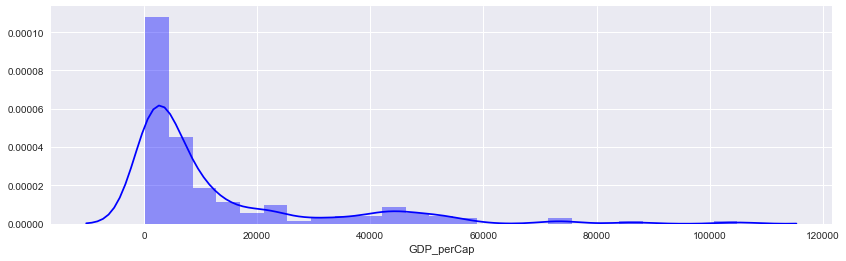

In [114]:
# Alter plot figure size
plt.figure(figsize=(14,4))

# Plot distribution of GDP per capita
sns.distplot(df['GDP_perCap'], bins=25, color='blue')

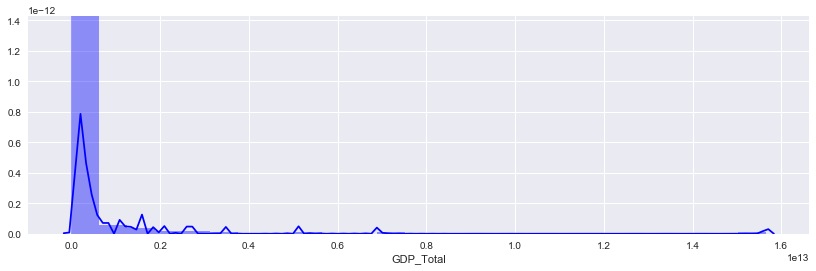

In [115]:
# Alter plot figure size
plt.figure(figsize=(14,4))

# Plot distribution of Total GDP
sns.distplot(df['GDP_Total'], bins=25, color='blue')

## GDP by income group
It's obvious that higher income groups will have higher GDP values, however, due to our abnormal distribution, it could be useful to see the amount of disparity there is between income groups based on GDP.

Below:
* As we can see, the amount of difference between upper middle and high income is high
* Differences between low, lower middle, and upper middle is much less

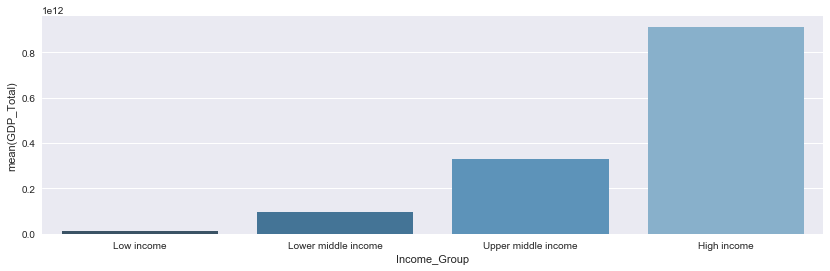

In [18]:
# Create list for xlabel order
order = ['Low income', 'Lower middle income', 'Upper middle income', 'High income']

# Group by income group and return mean GDP_Total: GDPbyIncome
GDPbyIncome = df.groupby('Income_Group')['GDP_Total'].mean().reset_index()

# Adjust size of plot figure
plt.figure(figsize=(14,4))

# Create barplot from grouped object
sns.barplot(data=GDPbyIncome, x='Income_Group', y='GDP_Total', order=order, palette="Blues_d")

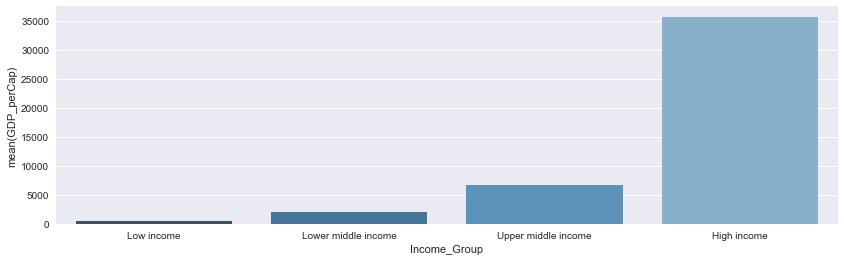

In [19]:
# Create list for xlabel order
order = ['Low income', 'Lower middle income', 'Upper middle income', 'High income']

# Return mean GDP_perCap by income group and plot barplot
GDPbyIncome = df.groupby('Income_Group')['GDP_perCap'].mean().reset_index()

# Adjust size of plot figure
plt.figure(figsize=(14,4))

# Create barplot from grouped object
sns.barplot(data=GDPbyIncome, x='Income_Group', y='GDP_perCap', order=order, palette="Blues_d")

## Heatmap Insight
We currently have two potential target indicators, GDP per capita and GDP. Both have fairly similar relationships with the rest of the data.

GDP and GDP per capita:

Positive:

* Emissions
* Fossil fuel consumption
* Tech exports
* Electricity consumption
* Electricity Access
* Improved sanitation access
* Adult literacy
* Corruption perception index
* School enrollment
* Life Expectancy

Negative: 

* Inflation
* Infant Mortality
* Business registration procedure
* Commercial tax

It appears that there are stronger relationships between GDP per capita and the indicators as opposed to total GDP. As a result, it might be best to simply examine GDP per capita to capitalize on the effect of these stronger relationships

Other observations:
* Commtax, BusReg, Inflation, and Ore/metal exports are the least correlated with other indicators

Notably strong postive correlations:
Electricity access with:
* life expectancy
* adult literacy

Notably strong negative correlations:
Infant mortality with:
* life expectancy
* adult literacy
* school enrolment
* Electricity access
* Sanitation Access

Correlation between Electricity Generation Oil/Gas/Coal and fossil fuel consumption could be problematic (multicollinearity)

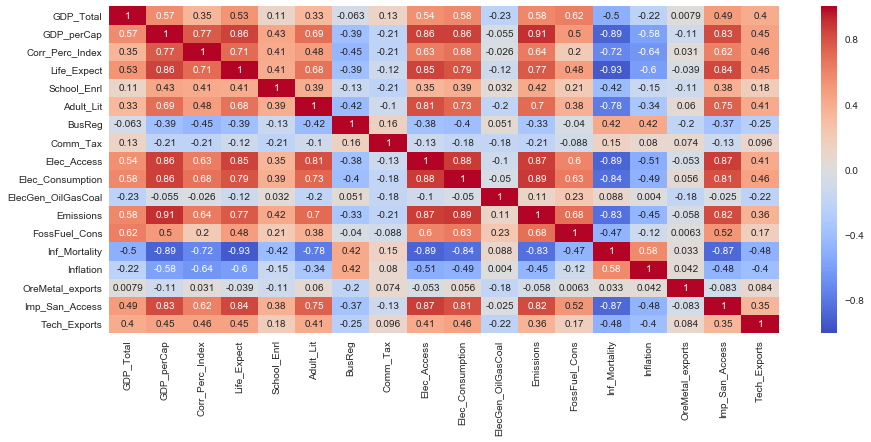

In [134]:
# Alter figure size
plt.figure(figsize=(15,6))

# Plot heatmap using correlation matrix of our data
sns.heatmap(df.corr(method='spearman'), annot=True, cmap='coolwarm')

# Outliers
In this section, we will plot each indicator as a boxplot to ascertain if there are outliers

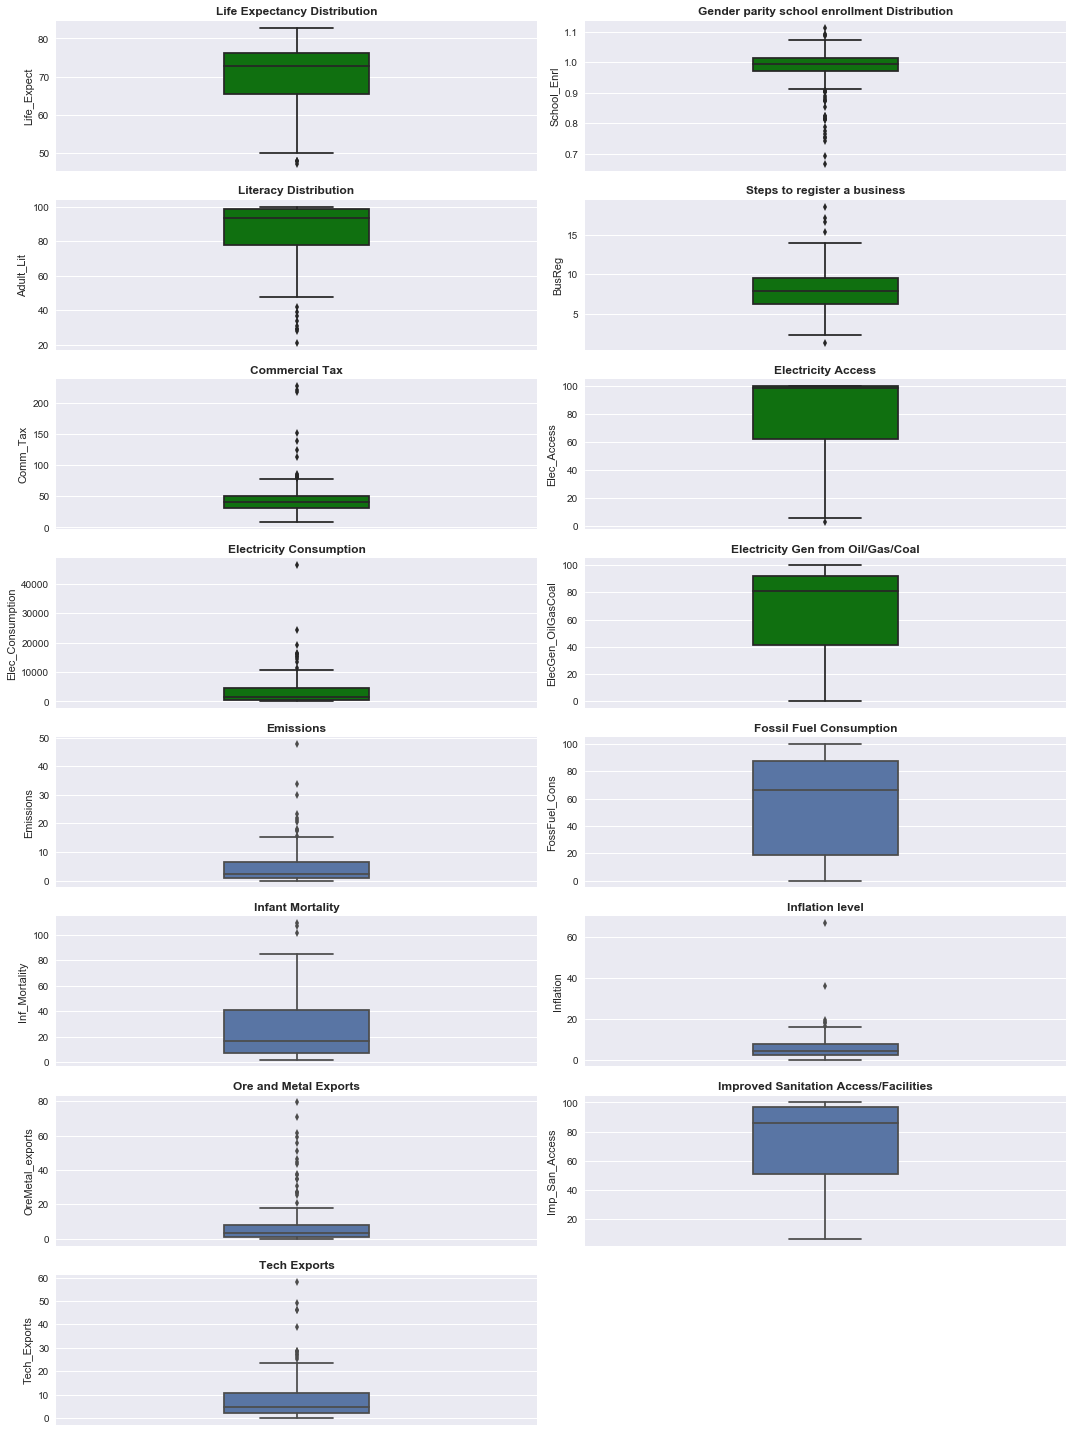

In [161]:
# Instantiate plotting figure
fig = plt.figure(figsize=(15,20))

# Subplot 1
ax1 = fig.add_subplot(821)
# Set Labels
ax1.set_title('Life Expectancy Distribution', fontweight='bold')
# Plot data
sns.boxplot(data=df, y='Life_Expect', ax=ax1, width=0.3, color='green')

# subplot 2
ax2 = fig.add_subplot(822)
# Set Labels
ax2.set_title('Gender parity school enrollment Distribution', fontweight='bold')
# Plot data
sns.boxplot(data=df, y='School_Enrl', ax=ax2, width=0.3, color='green')

# subplot 3
ax3 = fig.add_subplot(823)
# Set Labels
ax3.set_title('Literacy Distribution', fontweight='bold')
# Plot data
sns.boxplot(data=df, y='Adult_Lit', ax=ax3, width=0.3, color='green')

# subplot 4
ax4 = fig.add_subplot(824)
# Set Labels
ax4.set_title('Steps to register a business', fontweight='bold')
# Plot data
sns.boxplot(data=df, y='BusReg', ax=ax4, width=0.3, color='green')

# subplot 5
ax5 = fig.add_subplot(825)
# Set Labels
ax5.set_title('Commercial Tax', fontweight='bold')
# Plot data
sns.boxplot(data=df, y='Comm_Tax', ax=ax5, width=0.3, color='green')

# subplot 6
ax6 = fig.add_subplot(826)
# Set Labels
ax6.set_title('Electricity Access', fontweight='bold')
# Plot data
sns.boxplot(data=df, y='Elec_Access', ax=ax6, width=0.3, color='green')

# subplot 7
ax7 = fig.add_subplot(827)
# Set Labels
ax7.set_title('Electricity Consumption', fontweight='bold')
# Plot data
sns.boxplot(data=df, y='Elec_Consumption', ax=ax7, width=0.3, color='green')

# subplot 8
ax8 = fig.add_subplot(828)
# Set Labels
ax8.set_title('Electricity Gen from Oil/Gas/Coal', fontweight='bold')
# Plot data
sns.boxplot(data=df, y='ElecGen_OilGasCoal', ax=ax8, width=0.3, color='green')

# subplot 9
ax9 = fig.add_subplot(829)
# Set Labels
ax9.set_title('Emissions', fontweight='bold')
# Plot data
sns.boxplot(data=df, y='Emissions', ax=ax9, width=0.3)

# subplot 10
ax10 = fig.add_subplot(8,2,10)
# Set Labels
ax10.set_title('Fossil Fuel Consumption', fontweight='bold')
# Plot data
sns.boxplot(data=df, y='FossFuel_Cons', ax=ax10, width=0.3)

# subplot 11
ax11 = fig.add_subplot(8,2,11)
# Set Labels
ax11.set_title('Infant Mortality', fontweight='bold')
# Plot data
sns.boxplot(data=df, y='Inf_Mortality', ax=ax11, width=0.3)

# subplot 12
ax12 = fig.add_subplot(8,2,12)
# Set Labels
ax12.set_title('Inflation level', fontweight='bold')
# Plot data
sns.boxplot(data=df, y='Inflation', ax=ax12, width=0.3)

# subplot 13
ax13 = fig.add_subplot(8,2,13)
# Set Labels
ax13.set_title('Ore and Metal Exports', fontweight='bold')
# Plot data
sns.boxplot(data=df, y='OreMetal_exports', ax=ax13, width=0.3)

# subplot 14
ax14 = fig.add_subplot(8,2,14)
# Set Labels
ax14.set_title('Improved Sanitation Access/Facilities', fontweight='bold')
# Plot data
sns.boxplot(data=df, y='Imp_San_Access', ax=ax14, width=0.3)

# subplot 15
ax15 = fig.add_subplot(8,2,15)
# Set Labels
ax15.set_title('Tech Exports', fontweight='bold')
# Plot data
sns.boxplot(data=df, y='Tech_Exports', ax=ax15, width=0.3)

# Set a tight layout
plt.tight_layout()

From the boxplots above, we can see that the nature of the world is actually quite unpredictable.

* A lot of indicators have outliers that are greatly different from the rest of the data. 

* Due to our limited dataset, we don't wish to remove all outliers, due to a lack of observations. It's also worth keeping some outliers to train our model using imperfect, yet realistic data


### Notable outliers

An outlier in Electricity Consumption was found. Iceland consumes greatly more electricity than others. Could this potentially be due to colder weather and the need for constant heating?

In [22]:
df[df['Elec_Consumption']>40000]

,Country,WB_Code,Region,Income_Group,GDP_Total,GDP_perCap,Corr_Perc_Index,Life_Expect,School_Enrl,Adult_Lit,...,Elec_Access,Elec_Consumption,ElecGen_OilGasCoal,Emissions,FossFuel_Cons,Inf_Mortality,Inflation,OreMetal_exports,Imp_San_Access,Tech_Exports
73,Iceland,ISL,Europe & Central Asia,High income,1.643286e+10,51645.326547,79.187139,82.039246,1.012878,99.2155,...,100.0,46314.037649,0.022222,6.622305,13.620135,1.918182,5.354035,34.896177,98.8,28.788024


Outliers in Commercial tax were found.
Congo, Comoros, and Gambia all have extremely high total tax rates. Apparently the rates are greater than 200% of commercial profits

In [23]:
df[df['Comm_Tax']>200]

,Country,WB_Code,Region,Income_Group,GDP_Total,GDP_perCap,Corr_Perc_Index,Life_Expect,School_Enrl,Adult_Lit,...,Elec_Access,Elec_Consumption,ElecGen_OilGasCoal,Emissions,FossFuel_Cons,Inf_Mortality,Inflation,OreMetal_exports,Imp_San_Access,Tech_Exports
32,"Congo, Dem. Rep.",COD,Sub-Saharan Africa,Low income,2.392996e+10,353.151394,21.600000,56.657772,0.789078,71.148137,...,12.534044,105.553033,0.674274,0.031893,3.308983,85.000000,11.687474,10.558537,26.772727,3.550730
35,Comoros,COM,Sub-Saharan Africa,Low income,5.360500e+08,761.922247,22.934192,61.826475,0.977530,77.855331,...,62.676687,613.239302,91.983785,0.188718,0.000000,62.972727,1.688445,0.384712,32.636364,2.192681
60,"Gambia, The",GMB,Sub-Saharan Africa,Low income,8.641729e+08,500.967583,25.287054,59.277086,1.007447,54.980162,...,41.349989,613.239302,91.983785,0.254212,0.000000,51.972727,4.893207,6.029827,58.900000,1.790548


Aside from Zimbabwe, there is also another outlier found within Inflation.
South Sudan has a fairly high inflation rate, although, not anywhere near Zimbabwe's. 

In [24]:
df[df['Inflation']>60]

,Country,WB_Code,Region,Income_Group,GDP_Total,GDP_perCap,Corr_Perc_Index,Life_Expect,School_Enrl,Adult_Lit,...,Elec_Access,Elec_Consumption,ElecGen_OilGasCoal,Emissions,FossFuel_Cons,Inf_Mortality,Inflation,OreMetal_exports,Imp_San_Access,Tech_Exports
137,South Sudan,SSD,Sub-Saharan Africa,Low income,1.340741e+10,1283.371307,13.333333,53.654572,0.666510,29.403765,...,2.375128,39.478514,99.572332,0.126316,71.555697,71.618182,66.588306,10.558537,6.66,3.550730
168,Zimbabwe,ZWE,Sub-Saharan Africa,Low income,1.073958e+10,730.193974,20.181069,49.935246,0.980315,85.228096,...,35.404840,619.764948,36.075525,0.756363,27.306734,54.545455,2581.751550,27.692245,37.70,4.321716


### To be removed: 
* There is an extreme outlier within the Inflation column:
    - Zimbabwe

We will remove the row it as it may throw off our model.

In [126]:
df.columns.values

array(['Country', 'WB_Code', 'Region', 'Income_Group', 'GDP_Total',
       'GDP_perCap', 'Corr_Perc_Index', 'Life_Expect', 'School_Enrl',
       'Adult_Lit', 'BusReg', 'Comm_Tax', 'Elec_Access',
       'Elec_Consumption', 'ElecGen_OilGasCoal', 'Emissions',
       'FossFuel_Cons', 'Inf_Mortality', 'Inflation', 'OreMetal_exports',
       'Imp_San_Access', 'Tech_Exports'], dtype=object)

In [25]:
df = df.drop(labels=df[df['Inflation']>2500].index, axis=0).reset_index(drop=True)

## Aggregate Plots

We will have a look at aggregated (mean) data of our dataset to spot trends/observations

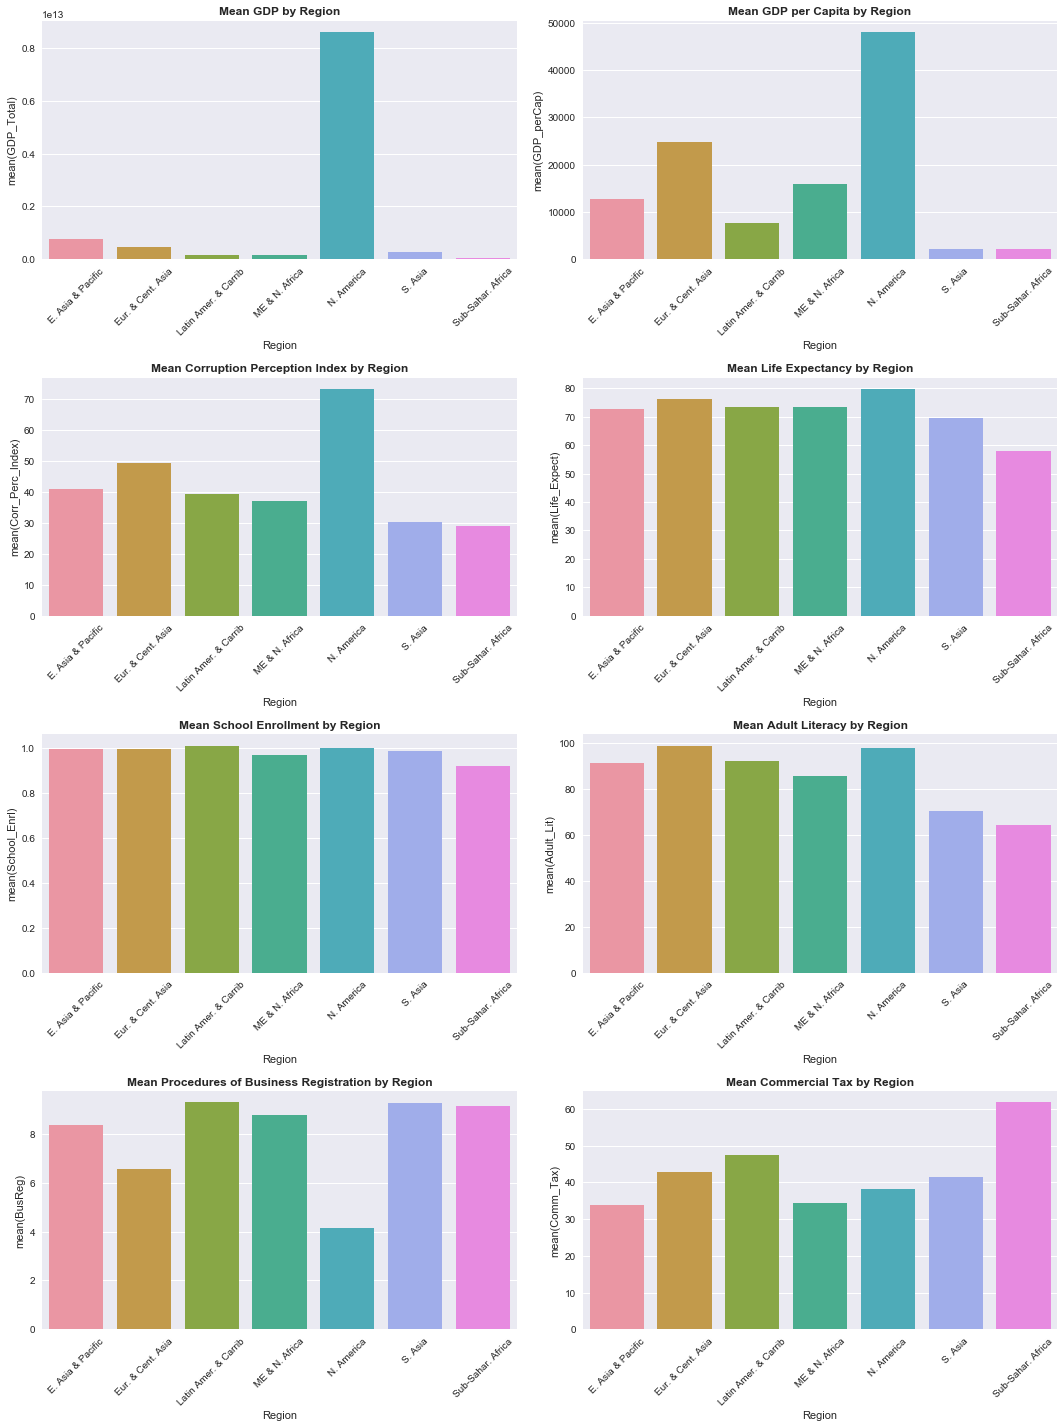

In [245]:
# Set up new labels for our x-axis
labels= ['E. Asia & Pacific', 'Eur. & Cent. Asia', 'Latin Amer. & Carrib', 'ME & N. Africa',
         'N. America', 'S. Asia', 'Sub-Sahar. Africa']

# Group by region and assign to variable: meanRegion
meanRegion = df.groupby('Region').mean().reset_index()

# Instantiate plotting figure
fig = plt.figure(figsize=(15,20))

# Subplot 1
ax1 = fig.add_subplot(421)
# Set Labels
ax1.set_ylabel('GDP')
ax1.set_xlabel('Region')
ax1.set_title('Mean GDP by Region', fontweight='bold')
# Plot data
sns.barplot(data=meanRegion, x='Region', y='GDP_Total', ax=ax1)
# Add custom x-axis labeling for each region
plt.xticks(range(7), labels, rotation=45)

# Subplot 2
ax2 = fig.add_subplot(422)
# Set Labels
ax2.set_ylabel('GDP per Capita')
ax2.set_xlabel('Region')
ax2.set_title('Mean GDP per Capita by Region', fontweight='bold')
# Plot data
sns.barplot(data=meanRegion, x='Region', y='GDP_perCap', ax=ax2)
# Add custom x-axis labeling for each region
plt.xticks(range(7), labels, rotation=45)

# Subplot 3
ax3 = fig.add_subplot(423)
# Set Labels
ax3.set_ylabel('CPI')
ax3.set_xlabel('Region')
ax3.set_title('Mean Corruption Perception Index by Region', fontweight='bold')
# Plot data
sns.barplot(data=meanRegion, x='Region', y='Corr_Perc_Index', ax=ax3)
# Add custom x-axis labeling for each region
plt.xticks(range(7), labels, rotation=45)

# Subplot 4
ax4 = fig.add_subplot(424)
# Set Labels
ax4.set_ylabel('Life Expectancy')
ax4.set_xlabel('Region')
ax4.set_title('Mean Life Expectancy by Region', fontweight='bold')
# Plot data
sns.barplot(data=meanRegion, x='Region', y='Life_Expect', ax=ax4)
# Add custom x-axis labeling for each region
plt.xticks(range(7), labels, rotation=45)

# Subplot 5
ax5 = fig.add_subplot(425)
# Set Labels
ax5.set_ylabel('School Enrollment')
ax5.set_xlabel('Region')
ax5.set_title('Mean School Enrollment by Region', fontweight='bold')
# Plot data
sns.barplot(data=meanRegion, x='Region', y='School_Enrl', ax=ax5)
# Add custom x-axis labeling for each region
plt.xticks(range(7), labels, rotation=45)

# Subplot 6
ax6 = fig.add_subplot(426)
# Set Labels
ax6.set_ylabel('Adult Literacy')
ax6.set_xlabel('Region')
ax6.set_title('Mean Adult Literacy by Region', fontweight='bold')
# Plot data
sns.barplot(data=meanRegion, x='Region', y='Adult_Lit', ax=ax6)
# Add custom x-axis labeling for each region
plt.xticks(range(7), labels, rotation=45)

# Subplot 7
ax7 = fig.add_subplot(427)
# Set Labels
ax7.set_ylabel('Steps Required for Business Registration')
ax7.set_xlabel('Region')
ax7.set_title('Mean Procedures of Business Registration by Region', fontweight='bold')
# Plot data
sns.barplot(data=meanRegion, x='Region', y='BusReg', ax=ax7)
# Add custom x-axis labeling for each region
plt.xticks(range(7), labels, rotation=45)

# Subplot 8
ax8 = fig.add_subplot(428)
# Set Labels
ax8.set_ylabel('Total Commercial Tax')
ax8.set_xlabel('Region')
ax8.set_title('Mean Commercial Tax by Region', fontweight='bold')
# Plot data
sns.barplot(data=meanRegion, x='Region', y='Comm_Tax', ax=ax8)
# Add custom x-axis labeling for each region
plt.xticks(range(7), labels, rotation=45)

# Set a tight layout
plt.tight_layout()

### Aggregate Observations (part 1)

* GDP is dominated by N. America, however, when accounting for population (GDP per capita), we notice more clearly that it's followed by Europe and Central Asia.
* N. American governments are viewed as the least corrupt in the world
* Life expectancy is fairly balanced between regions with only S.Asia and Sub-Saharan Africa being below 70 years of age. Sub-Saharan Africa is the poorest performer with life expectancy less than 60 years.
* School Enrollment fairly balanced between regions, with Sub-Saharan Africa lagging behind by about 15%
* Adult Literacy is actually quite different among regions. Most regions have levels above 80% with S.Asia and Sub-Saharan Africa performing worse with approximately 70% and 65% respectively.
* North America is easily the least difficult region to establish a business on average. It is followed by Europe and central Asia, with other regions having 8 steps or greater
* Taxation is lowest in East Asia & Pacific and Middle East & N. Africa. The highest Commercial tax rates are in Sub-Saharan Africa

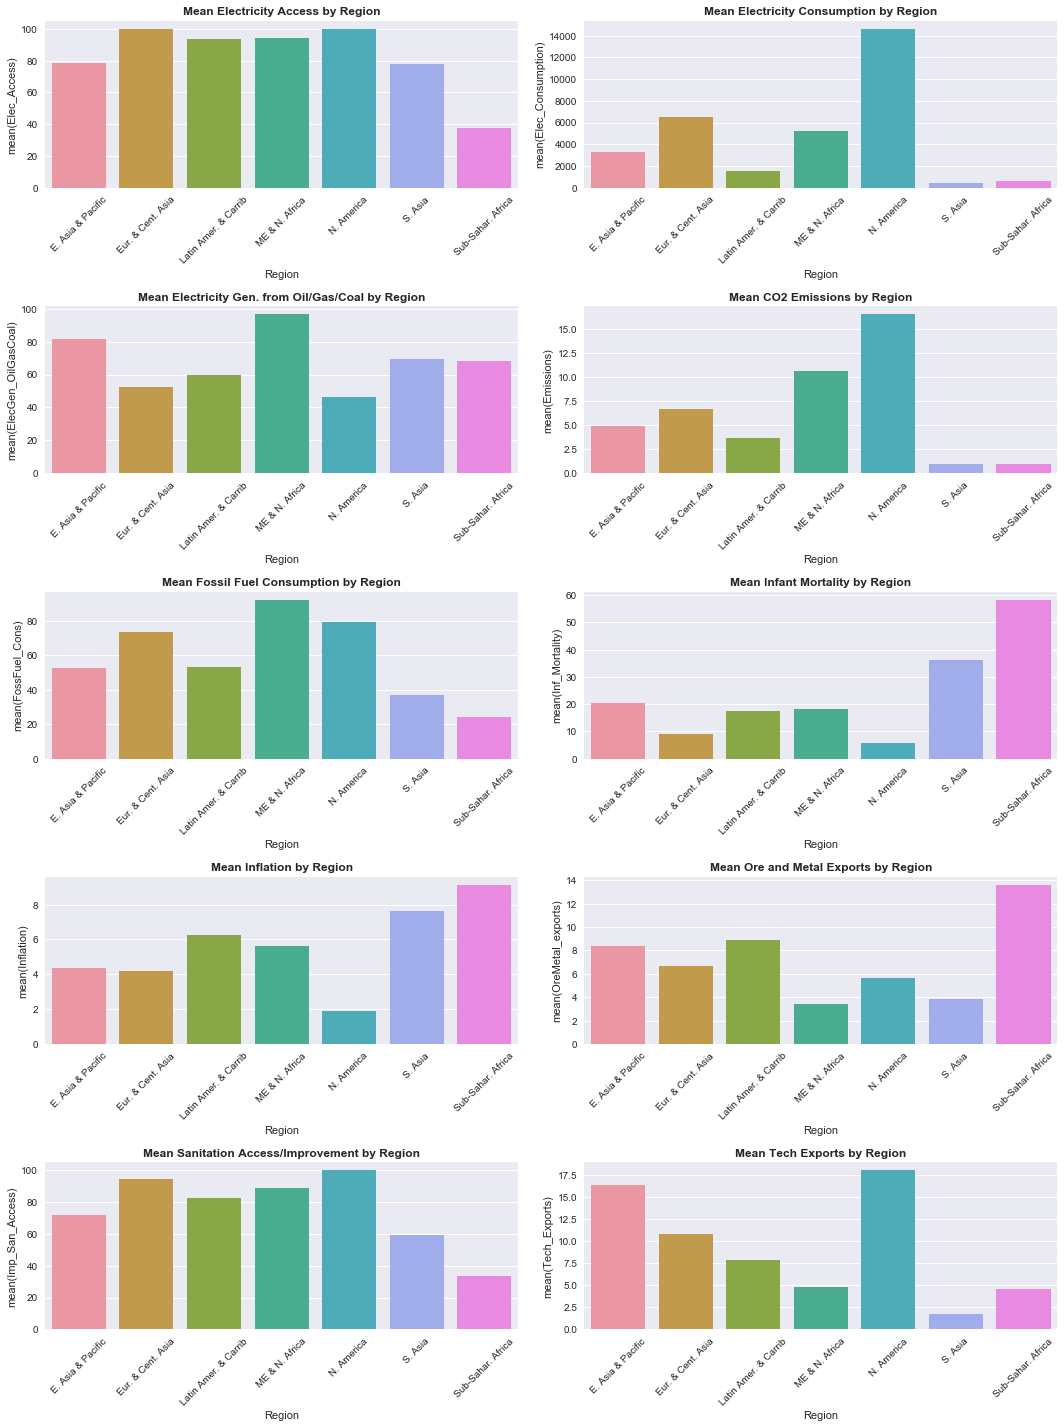

In [247]:
# Set up new labels for our x-axis
labels= ['E. Asia & Pacific', 'Eur. & Cent. Asia', 'Latin Amer. & Carrib', 'ME & N. Africa',
         'N. America', 'S. Asia', 'Sub-Sahar. Africa']

# Instantiate plotting figure
fig = plt.figure(figsize=(15,20))

# Subplot 1
ax1 = fig.add_subplot(521)
# Set Labels
ax1.set_ylabel('Electricity Access')
ax1.set_xlabel('Region')
ax1.set_title('Mean Electricity Access by Region', fontweight='bold')
# Plot data
sns.barplot(data=meanRegion, x='Region', y='Elec_Access', ax=ax1)
# Add custom x-axis labeling for each region
plt.xticks(range(7), labels, rotation=45)

# Subplot 2
ax2 = fig.add_subplot(522)
# Set Labels
ax2.set_ylabel('Electricity Consumption')
ax2.set_xlabel('Region')
ax2.set_title('Mean Electricity Consumption by Region', fontweight='bold')
# Plot data
sns.barplot(data=meanRegion, x='Region', y='Elec_Consumption', ax=ax2)
# Add custom x-axis labeling for each region
plt.xticks(range(7), labels, rotation=45)

# Subplot 3
ax3 = fig.add_subplot(523)
# Set Labels
ax3.set_ylabel('Electricity Generated')
ax3.set_xlabel('Region')
ax3.set_title('Mean Electricity Gen. from Oil/Gas/Coal by Region', fontweight='bold')
# Plot data
sns.barplot(data=meanRegion, x='Region', y='ElecGen_OilGasCoal', ax=ax3)
# Add custom x-axis labeling for each region
plt.xticks(range(7), labels, rotation=45)

# Subplot 4
ax4 = fig.add_subplot(524)
# Set Labels
ax4.set_ylabel('CO2 Emission level')
ax4.set_xlabel('Region')
ax4.set_title('Mean CO2 Emissions by Region', fontweight='bold')
# Plot data
sns.barplot(data=meanRegion, x='Region', y='Emissions', ax=ax4)
# Add custom x-axis labeling for each region
plt.xticks(range(7), labels, rotation=45)

# Subplot 5
ax5 = fig.add_subplot(525)
# Set Labels
ax5.set_ylabel('Fossil Fuel Consumption')
ax5.set_xlabel('Region')
ax5.set_title('Mean Fossil Fuel Consumption by Region', fontweight='bold')
# Plot data
sns.barplot(data=meanRegion, x='Region', y='FossFuel_Cons', ax=ax5)
# Add custom x-axis labeling for each region
plt.xticks(range(7), labels, rotation=45)

# Subplot 6
ax6 = fig.add_subplot(526)
# Set Labels
ax6.set_ylabel('Infant Mortality')
ax6.set_xlabel('Region')
ax6.set_title('Mean Infant Mortality by Region', fontweight='bold')
# Plot data
sns.barplot(data=meanRegion, x='Region', y='Inf_Mortality', ax=ax6)
# Add custom x-axis labeling for each region
plt.xticks(range(7), labels, rotation=45)

# Subplot 7
ax7 = fig.add_subplot(527)
# Set Labels
ax7.set_ylabel('Level of inflation')
ax7.set_xlabel('Region')
ax7.set_title('Mean Inflation by Region', fontweight='bold')
# Plot data
sns.barplot(data=meanRegion, x='Region', y='Inflation', ax=ax7)
# Add custom x-axis labeling for each region
plt.xticks(range(7), labels, rotation=45)

# Subplot 8
ax8 = fig.add_subplot(528)
# Set Labels
ax8.set_ylabel('Ore/Metal Exports')
ax8.set_xlabel('Region')
ax8.set_title('Mean Ore and Metal Exports by Region', fontweight='bold')
# Plot data
sns.barplot(data=meanRegion, x='Region', y='OreMetal_exports', ax=ax8)
# Add custom x-axis labeling for each region
plt.xticks(range(7), labels, rotation=45)

# Subplot 9
ax9 = fig.add_subplot(529)
# Set Labels
ax9.set_ylabel('Level of Sanitation Access')
ax9.set_xlabel('Region')
ax9.set_title('Mean Sanitation Access/Improvement by Region', fontweight='bold')
# Plot data
sns.barplot(data=meanRegion, x='Region', y='Imp_San_Access', ax=ax9)
# Add custom x-axis labeling for each region
plt.xticks(range(7), labels, rotation=45)

# Subplot 10
ax10 = fig.add_subplot(5,2,10)
# Set Labels
ax10.set_ylabel('Tech Exports')
ax10.set_xlabel('Region')
ax10.set_title('Mean Tech Exports by Region', fontweight='bold')
# Plot data
sns.barplot(data=meanRegion, x='Region', y='Tech_Exports', ax=ax10)
# Add custom x-axis labeling for each region
plt.xticks(range(7), labels, rotation=45)

# Set a tight layout
plt.tight_layout()

### Aggregate Observations (Part 2)

* Electricity access is generally high, with East Asia & Pacific, S. Asia, and Sub-Saharan Africa lagging behind. Sub-Saharan Africa has lowest access, with less than 40%

* Electricity Consumption is highest in N. America as expected. All the rest of the regions trail at less than 50% of the average N. America value

* Electricity generation from oil/coal/gas are greatest in ME & N. Africa as expected, followed by E. Asia and Pacific. The lowest electricity generation average from these traditional methods is in N. America.

* CO2 emissions are predominantly generated by N.America followed by the Middle East and N. Africa. This is surprising considering there are greater populations and manufacturing in Asia

* Average fossil fuel consumption is greatest in the ME & N. Africa followed by N. America and Europe/Central Asia.  It's surprising that the average is highest in ME & N. Africa. This could potentially be due to subsidies for fossil fuels in the area (Saudi Arabia indirectly subsidized their state owned Aramco in 2015 with an estimated 51 billion dollars).

* The two highest regions for average infant mortality is Sub-Saharan Africa and S. Asia

* Inflation is also highest in Sub-Saharan Africa and S. Asia. N. America has the lowest inflation overall.

* Sub-Saharan Africa dominates in ore and metal exports, greatly outperforming all regions. Exporting of natural resources indicates a level of 'true wealth', however,  this does not seem to translate to better performing QOL or GDP indicators.

* Most regions perform above 80% for access to Sanitation, with E. Asia & Pacific, S. Asia, and Africa lagging behind. Africa is performing particularly poorly with less than 40% access

* Average tech exports is not surprising. Best performer is N. America, followed by E. Asia & Pacific (Countries like Australia, Japan, China, Malaysia, Singapore, Thailand). This was expected.

# Building a model

## Assign our Target and Predictor variables

### NOTE: 
The below cell should be run if you intend to use all features in the model

In [50]:
# Assign series GDP_perCap from df to variable: target
target = df['GDP_perCap']

# Assign features by subsetting table to indicator values excl. GDP: X
X = df.iloc[:,6:]

# Print shape and head
print(X.shape)
X.head()

(168, 16)


,Corr_Perc_Index,Life_Expect,School_Enrl,Adult_Lit,BusReg,Comm_Tax,Elec_Access,Elec_Consumption,ElecGen_OilGasCoal,Emissions,FossFuel_Cons,Inf_Mortality,Inflation,OreMetal_exports,Imp_San_Access,Tech_Exports
0,18.332996,50.641512,0.775603,71.077625,9.000000,51.616667,35.463961,197.167152,31.050886,1.196247,40.288083,109.209091,14.501919,2.163706,45.945455,2.863293
1,29.427881,77.048851,0.970084,96.896202,7.166667,42.683333,100.000000,1871.697998,0.692732,1.520814,62.364696,15.036364,2.425513,15.937547,90.709091,1.811513
2,59.822008,76.650933,1.009029,91.510109,7.416667,14.683333,100.000000,11289.011180,99.963217,21.350428,99.908793,7.218182,3.595969,1.669955,97.509091,3.582723
3,28.924810,75.496980,1.039434,98.061996,13.750000,113.266667,98.565492,2736.944200,63.396101,4.471435,89.208622,13.054545,9.459358,3.687220,94.836364,7.475657
4,28.966300,74.154237,1.113875,99.756413,5.750000,33.333333,99.830103,1759.136059,30.575778,1.682244,71.397707,16.354545,4.159615,37.414864,89.490909,2.404980


### FEATURE SELECTION Note:
The cell below contains two different assignments for the variable rowsToUse and is used INSTEAD of the cell above. 

We tested our feature selection by assigning our variables different predictor columns below.

Simply comment/uncomment the variable assignment code below ('rowsToUse=') that you wish to test.

The scores have been split in the below cells to better compare our results of different feature selections.

In [149]:
# Use heatmap predictors
# rowsToUse = ['Corr_Perc_Index', 'School_Enrl', 'Adult_Lit','BusReg', 'Comm_Tax', 'Elec_Consumption',
#              'Emissions', 'FossFuel_Cons', 'Inf_Mortality', 'Inflation', 'Elec_Access', 'Imp_San_Access',
#              'Tech_Exports', 'Life_Expect']

# Use optimize attempt predictors
rowsToUse = ['Corr_Perc_Index', 'School_Enrl', 'Elec_Consumption','Emissions', 'Inf_Mortality', 
             'OreMetal_exports', 'Elec_Access']


# Assign series GDP_perCap from df to variable: target
target = df['GDP_perCap']

# Assign features by subsetting table to indicator values excl. GDP: X
X = df.loc[:,rowsToUse]

# Print shape and head
print(X.shape)
X.head()

(168, 7)


,Corr_Perc_Index,School_Enrl,Elec_Consumption,Emissions,Inf_Mortality,OreMetal_exports,Elec_Access
0,18.332996,0.775603,197.167152,1.196247,109.209091,2.163706,35.463961
1,29.427881,0.970084,1871.697998,1.520814,15.036364,15.937547,100.000000
2,59.822008,1.009029,11289.011180,21.350428,7.218182,1.669955,100.000000
3,28.924810,1.039434,2736.944200,4.471435,13.054545,3.687220,98.565492
4,28.966300,1.113875,1759.136059,1.682244,16.354545,37.414864,99.830103


## Splitting our data

In [150]:
from sklearn.model_selection import train_test_split

# Split our training and testing data into their respective variables
X_train, X_test, y_train, y_test = train_test_split(X, target, random_state=46)

In [151]:
# Standardize our predictor ariables
X_train = X_train.apply(zscore)
X_test = X_test.apply(zscore)

In [152]:
X_train.head()

,Corr_Perc_Index,School_Enrl,Elec_Consumption,Emissions,Inf_Mortality,OreMetal_exports,Elec_Access
132,2.462510,0.373081,0.970707,0.564008,-1.007483,-0.530482,0.650813
162,-0.693708,0.271279,-0.430411,-0.545155,-0.265809,-0.567166,0.559528
0,-1.156686,-2.554438,-0.574156,-0.602767,3.491879,-0.466798,-1.581567
87,1.167510,0.578202,-0.497798,-0.404393,-0.513543,-0.330347,0.485193
148,-1.038489,-0.849777,-0.268523,-0.750884,0.800443,-0.114754,0.627863


## Modelling

In [153]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Instantiate our regression models
model1 = LinearRegression()
model2 = LassoCV()
model3 = RidgeCV()
model4 = ElasticNetCV()
model5 = RandomForestRegressor(min_samples_leaf=2, n_jobs=3, random_state=47)
model6 = BaggingRegressor()
model7 = GradientBoostingRegressor(learning_rate=0.3, random_state=47)
model8 = KNeighborsRegressor(p=1, n_neighbors=2, leaf_size=30)

# Fit our models to our training data
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)
model5.fit(X_train, y_train)
model6.fit(X_train, y_train)
model7.fit(X_train, y_train)
model8.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=2, p=1,
          weights='uniform')

In [55]:
# All Features Model Score

print('Linear Reg: {}\nRMSE: {}\n'.format(model1.score(X_test, y_test), 
                                        np.sqrt(mean_squared_error(y_test, model1.predict(X_test)))))
print('Lasso: {}\nRMSE: {}\n'.format(model2.score(X_test, y_test), 
                                        np.sqrt(mean_squared_error(y_test, model2.predict(X_test)))))
print('Ridge: {}\nRMSE: {}\n'.format(model3.score(X_test, y_test), 
                                        np.sqrt(mean_squared_error(y_test, model3.predict(X_test)))))
print('ElasticNet: {}\nRMSE: {}\n'.format(model4.score(X_test, y_test), 
                                        np.sqrt(mean_squared_error(y_test, model4.predict(X_test)))))
print('Rand Forest: {}\nRMSE: {}\n'.format(model5.score(X_test, y_test), 
                                        np.sqrt(mean_squared_error(y_test, model5.predict(X_test)))))
print('Bagging: {}\nRMSE: {}\n'.format(model6.score(X_test, y_test), 
                                        np.sqrt(mean_squared_error(y_test, model6.predict(X_test)))))
print('Gradient Boost: {}\nRMSE: {}\n'.format(model7.score(X_test, y_test), 
                                        np.sqrt(mean_squared_error(y_test, model7.predict(X_test)))))
print('KNN: {}\nRMSE: {}\n'.format(model8.score(X_test, y_test), 
                                        np.sqrt(mean_squared_error(y_test, model8.predict(X_test)))))

Linear Reg: 0.663990848387
RMSE: 14610.0465639

Lasso: 0.592724761002
RMSE: 16084.9624224

Ridge: 0.649245125107
RMSE: 14927.1846429

ElasticNet: 0.164511304119
RMSE: 23038.0828724

Rand Forest: 0.717452852936
RMSE: 13397.4304228

Bagging: 0.683105157638
RMSE: 14188.4068232

Gradient Boost: 0.620841836319
RMSE: 15519.8047299

KNN: 0.723566234195
RMSE: 13251.699896



In [148]:
# Heatmap Predictor model Score
print('Linear Reg: {}\nRMSE: {}\n'.format(model1.score(X_test, y_test), 
                                        np.sqrt(mean_squared_error(y_test, model1.predict(X_test)))))
print('Lasso: {}\nRMSE: {}\n'.format(model2.score(X_test, y_test), 
                                        np.sqrt(mean_squared_error(y_test, model2.predict(X_test)))))
print('Ridge: {}\nRMSE: {}\n'.format(model3.score(X_test, y_test), 
                                        np.sqrt(mean_squared_error(y_test, model3.predict(X_test)))))
print('ElasticNet: {}\nRMSE: {}\n'.format(model4.score(X_test, y_test), 
                                        np.sqrt(mean_squared_error(y_test, model4.predict(X_test)))))
print('Rand Forest: {}\nRMSE: {}\n'.format(model5.score(X_test, y_test), 
                                        np.sqrt(mean_squared_error(y_test, model5.predict(X_test)))))
print('Bagging: {}\nRMSE: {}\n'.format(model6.score(X_test, y_test), 
                                        np.sqrt(mean_squared_error(y_test, model6.predict(X_test)))))
print('Gradient Boost: {}\nRMSE: {}\n'.format(model7.score(X_test, y_test), 
                                        np.sqrt(mean_squared_error(y_test, model7.predict(X_test)))))
print('KNN: {}\nRMSE: {}\n'.format(model8.score(X_test, y_test), 
                                        np.sqrt(mean_squared_error(y_test, model8.predict(X_test)))))

Linear Reg: 0.660276881304
RMSE: 14690.5683518

Lasso: 0.592738462653
RMSE: 16084.6918531

Ridge: 0.64019876948
RMSE: 15118.4535242

ElasticNet: 0.162390966374
RMSE: 23067.2978479

Rand Forest: 0.714981681419
RMSE: 13455.8901772

Bagging: 0.702983944793
RMSE: 13736.1811606

Gradient Boost: 0.615263629327
RMSE: 15633.552232

KNN: 0.695008172904
RMSE: 13919.3882243



In [154]:
# Feature elimination model score
print('Linear Reg: {}\nRMSE: {}\n'.format(model1.score(X_test, y_test), 
                                        np.sqrt(mean_squared_error(y_test, model1.predict(X_test)))))
print('Lasso: {}\nRMSE: {}\n'.format(model2.score(X_test, y_test), 
                                        np.sqrt(mean_squared_error(y_test, model2.predict(X_test)))))
print('Ridge: {}\nRMSE: {}\n'.format(model3.score(X_test, y_test), 
                                        np.sqrt(mean_squared_error(y_test, model3.predict(X_test)))))
print('ElasticNet: {}\nRMSE: {}\n'.format(model4.score(X_test, y_test), 
                                        np.sqrt(mean_squared_error(y_test, model4.predict(X_test)))))
print('Rand Forest: {}\nRMSE: {}\n'.format(model5.score(X_test, y_test), 
                                        np.sqrt(mean_squared_error(y_test, model5.predict(X_test)))))
print('Bagging: {}\nRMSE: {}\n'.format(model6.score(X_test, y_test), 
                                        np.sqrt(mean_squared_error(y_test, model6.predict(X_test)))))
print('Gradient Boost: {}\nRMSE: {}\n'.format(model7.score(X_test, y_test), 
                                        np.sqrt(mean_squared_error(y_test, model7.predict(X_test)))))
print('KNN: {}\nRMSE: {}\n'.format(model8.score(X_test, y_test), 
                                        np.sqrt(mean_squared_error(y_test, model8.predict(X_test)))))

Linear Reg: 0.64877090587
RMSE: 14937.2719825

Lasso: 0.587527704431
RMSE: 16187.263596

Ridge: 0.63765719609
RMSE: 15171.7566236

ElasticNet: 0.106620816277
RMSE: 23822.8634547

Rand Forest: 0.694371328794
RMSE: 13933.9129706

Bagging: 0.720512916556
RMSE: 13324.6839852

Gradient Boost: 0.630183135762
RMSE: 15327.4321722

KNN: 0.70481137592
RMSE: 13693.8591134



### Feature importance
Below we will have a look at some feature importances as determined by some of our models.

We will use this to optimize our feature selection and attempt to see if it improves our results. 


You can see the results of the feature selection above, with the optimize attempt feature scores.  Results were generally unfavorable to reducing features. The only model that improved performance was the bagging regressor, which still was unable to perform better than our KNN model with all features.

In [141]:
# Create dataframe of Features and weightings according to our Random Forest model

weights = pd.DataFrame({'Features': X.columns.values, 'RF: Weights': model5.feature_importances_, 'Ridge: Weights': model3.coef_})
weights

,Features,RF: Weights,Ridge: Weights
0,Corr_Perc_Index,0.093691,6605.288501
1,School_Enrl,0.002209,-1850.368482
2,Adult_Lit,0.001083,973.655160
3,BusReg,0.002223,-603.756647
4,Comm_Tax,0.003980,406.668808
5,Elec_Consumption,0.811673,4832.788955
6,Emissions,0.031268,2359.126381
7,FossFuel_Cons,0.007422,603.498083
8,Inf_Mortality,0.002402,687.429192
9,Inflation,0.010980,-277.315240


In [142]:
weights.set_index(keys='Features')

,RF: Weights,Ridge: Weights
Features,,
Corr_Perc_Index,0.093691,6605.288501
School_Enrl,0.002209,-1850.368482
Adult_Lit,0.001083,973.655160
BusReg,0.002223,-603.756647
Comm_Tax,0.003980,406.668808
Elec_Consumption,0.811673,4832.788955
Emissions,0.031268,2359.126381
FossFuel_Cons,0.007422,603.498083
Inf_Mortality,0.002402,687.429192


In [252]:
featureIndex

,RF: Weights,Ridge: Weights
Features,,
Corr_Perc_Index,0.093691,6605.288501
School_Enrl,0.002209,-1850.368482
Adult_Lit,0.001083,973.655160
BusReg,0.002223,-603.756647
Comm_Tax,0.003980,406.668808
Elec_Consumption,0.811673,4832.788955
Emissions,0.031268,2359.126381
FossFuel_Cons,0.007422,603.498083
Inf_Mortality,0.002402,687.429192


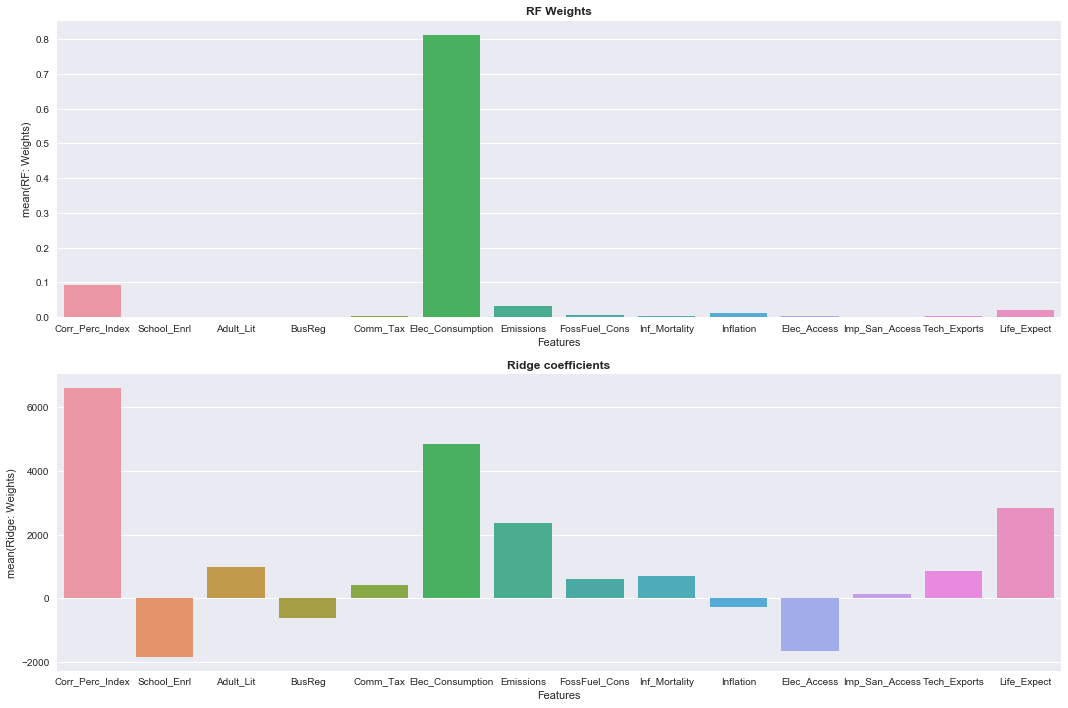

In [256]:
# Graph weights of features by model
featureIndex = weights.set_index(keys='Features')

# Instantiate plotting figure
fig = plt.figure(figsize=(15,10))

# Subplot 1
ax1 = fig.add_subplot(211)
# Set Labels
ax1.set_ylabel('Weight')
ax1.set_title('RF Weights', fontweight='bold')
# Plot data
sns.barplot(data=featureIndex, y='RF: Weights', x=featureIndex.index, ax=ax1)


# Subplot 2
ax2 = fig.add_subplot(212)
ax2.set_ylabel('Coefficient value')
ax2.set_title('Ridge coefficients', fontweight='bold')
# Plot data
sns.barplot(data=featureIndex, y='Ridge: Weights', x=featureIndex.index, ax=ax2)

plt.tight_layout()


According to Random Forest:

Predictors:
    * Electricity Consumption
    * Corruption Perception Index    
    * Emissions


According to Ridge: 

Predictors:
    * Corruption Perception Index
    * Electricity Consumption
    * Emissions
    * Life Expectancy
    * School Enrollment
    * Ore Metal Exports
    * Elec_Access

### How do our features compare to the heatmap?
Unfortunately, it appears that our model decreases in accuracy when only using the heatmap results. We were able to build a better model using all features.


## Best Model
Our best performing models was K-Nearest Neighbors with 72.36% and Random Forest with 71.74%, both with all features included.

# Model Improvement with PCA
We will attempt to further improve our model using PCA (Principal Component Analysis). We hope that this will allow us to reduce our features more successfully.

In [71]:
# Assign series GDP_perCap from df to variable: target
target = df['GDP_perCap']

# Assign features by subsetting table to indicator values excl. GDP: X
X = df.iloc[:,6:]

# Print shape and head
print(X.shape)
X.head()

(168, 16)


,Corr_Perc_Index,Life_Expect,School_Enrl,Adult_Lit,BusReg,Comm_Tax,Elec_Access,Elec_Consumption,ElecGen_OilGasCoal,Emissions,FossFuel_Cons,Inf_Mortality,Inflation,OreMetal_exports,Imp_San_Access,Tech_Exports
0,18.332996,50.641512,0.775603,71.077625,9.000000,51.616667,35.463961,197.167152,31.050886,1.196247,40.288083,109.209091,14.501919,2.163706,45.945455,2.863293
1,29.427881,77.048851,0.970084,96.896202,7.166667,42.683333,100.000000,1871.697998,0.692732,1.520814,62.364696,15.036364,2.425513,15.937547,90.709091,1.811513
2,59.822008,76.650933,1.009029,91.510109,7.416667,14.683333,100.000000,11289.011180,99.963217,21.350428,99.908793,7.218182,3.595969,1.669955,97.509091,3.582723
3,28.924810,75.496980,1.039434,98.061996,13.750000,113.266667,98.565492,2736.944200,63.396101,4.471435,89.208622,13.054545,9.459358,3.687220,94.836364,7.475657
4,28.966300,74.154237,1.113875,99.756413,5.750000,33.333333,99.830103,1759.136059,30.575778,1.682244,71.397707,16.354545,4.159615,37.414864,89.490909,2.404980


In [72]:
from sklearn.model_selection import train_test_split

# Split our training and testing data into their respective variables
X_train, X_test, y_train, y_test = train_test_split(X, target, random_state=46)

In [73]:
# Standardize our predictor variables
X_train = X_train.apply(zscore)
X_test = X_test.apply(zscore)

In [74]:
X_train.head()

,Corr_Perc_Index,Life_Expect,School_Enrl,Adult_Lit,BusReg,Comm_Tax,Elec_Access,Elec_Consumption,ElecGen_OilGasCoal,Emissions,FossFuel_Cons,Inf_Mortality,Inflation,OreMetal_exports,Imp_San_Access,Tech_Exports
132,2.462510,1.278191,0.373081,0.595075,-1.595868,-0.767272,0.650813,0.970707,1.015351,0.564008,1.192894,-1.007483,-0.580400,-0.530482,0.953965,4.055512
162,-0.693708,0.533229,0.271279,0.457803,0.375353,-0.230338,0.559528,-0.430411,-0.073513,-0.545155,0.277933,-0.265809,0.510081,-0.567166,-0.106262,0.442385
0,-1.156686,-2.297099,-2.554438,-0.860955,0.230410,0.156327,-1.581567,-0.574156,-1.094006,-0.602767,-0.442852,3.491879,1.301130,-0.466798,-0.938025,-0.571880
87,1.167510,0.455280,0.578202,0.418242,-1.045086,-0.368852,0.485193,-0.497798,0.843514,-0.404393,-1.587214,-0.513543,-0.503852,-0.330347,0.546356,0.272563
148,-1.038489,-0.244070,-0.849777,0.788782,0.056479,1.051559,0.627863,-0.268523,-2.043910,-0.750884,-0.429018,0.800443,0.421976,-0.114754,0.732501,-0.374958


### PCA Instantiation

In [75]:
from sklearn.decomposition import PCA

# Instantiate our PCA object
pca = PCA()

# Fit the PCA to our data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [64]:
# Print the components (feature probabilities by component)
pca.components_

array([[-0.27455465, -0.35431549, -0.26422475, -0.32774537,  0.15120495,
         0.12191192, -0.33935174, -0.2170318 ,  0.01233765, -0.24582464,
        -0.20977327,  0.3579788 ,  0.19666411,  0.09460389, -0.34518923,
        -0.14947504],
       [ 0.37024918, -0.0202297 , -0.18567862, -0.17360829, -0.39455249,
        -0.04119474, -0.21801788,  0.45562265, -0.19360168,  0.12103388,
        -0.16997741,  0.07224319, -0.06623066,  0.50192043, -0.11567219,
         0.17165247],
       [-0.01214816, -0.00668659, -0.33241845, -0.1906708 ,  0.13842424,
        -0.22164904, -0.01230892,  0.13515022,  0.48288684,  0.43232918,
         0.46303493,  0.02310717,  0.35550867,  0.05172792,  0.01057755,
         0.04523383],
       [-0.02918685,  0.03982306, -0.08200534,  0.05772809,  0.46193594,
         0.37194228,  0.01150285,  0.20352846, -0.48288123, -0.03843075,
         0.26560071,  0.03050503,  0.22337432, -0.00681245, -0.02066763,
         0.48757325],
       [ 0.20373775, -0.05909841,  0

In [65]:
# Assign Components information to df for easier viewing
pcaDF = pd.DataFrame(data=pca.components_, index=X.columns)

# Print head
pcaDF.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Corr_Perc_Index,-0.274555,-0.354315,-0.264225,-0.327745,0.151205,0.121912,-0.339352,-0.217032,0.012338,-0.245825,-0.209773,0.357979,0.196664,0.094604,-0.345189,-0.149475
Life_Expect,0.370249,-0.020230,-0.185679,-0.173608,-0.394552,-0.041195,-0.218018,0.455623,-0.193602,0.121034,-0.169977,0.072243,-0.066231,0.501920,-0.115672,0.171652
School_Enrl,-0.012148,-0.006687,-0.332418,-0.190671,0.138424,-0.221649,-0.012309,0.135150,0.482887,0.432329,0.463035,0.023107,0.355509,0.051728,0.010578,0.045234
Adult_Lit,-0.029187,0.039823,-0.082005,0.057728,0.461936,0.371942,0.011503,0.203528,-0.482881,-0.038431,0.265601,0.030505,0.223374,-0.006812,-0.020668,0.487573
BusReg,0.203738,-0.059098,0.053271,-0.129435,0.063514,0.529768,-0.075014,-0.002993,0.510303,0.151174,-0.165366,0.096256,-0.390833,-0.208646,-0.051547,0.355343


In [76]:
# Assign the explained variance ratio to variable: exp_var
exp_var = pca.explained_variance_ratio_

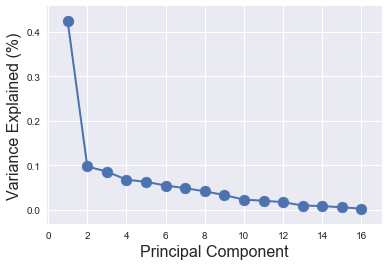

In [77]:
# Plot our points and connect by line
plt.plot(range(1, len(exp_var)+1), exp_var, lw=2)
plt.scatter(range(1, len(exp_var)+1), exp_var, s=120)

# Set text of x and y labels
plt.xlabel('Principal Component', fontsize=16)
plt.ylabel('Variance Explained (%)', fontsize=16)

### Principal component 1
Principal component is primarily made up of:
* Fossil Fuel Consumption (Negative)
* Inflation
* Life Expectancy


Component determined to be:
* Efficiency in consumption of fossil fuels, with long life and inflating prices

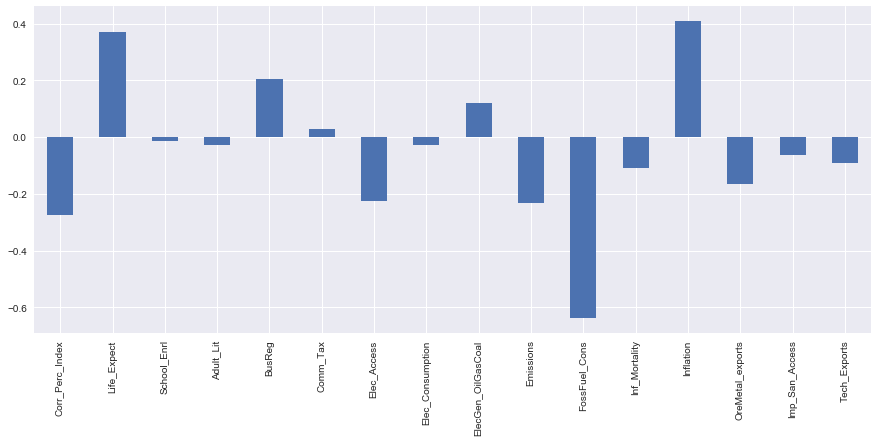

In [78]:
# Plot our first principal component weights
pcaDF[0].plot(kind='bar', figsize=(15,6))

### Principal Component 2
Principal component 2 is made up of primarily:
* Tech Exports
* Inflation
* Corruption Perception Index
* Emissions

Component determined to be:
* Technology exports with deflating prices and clean air.

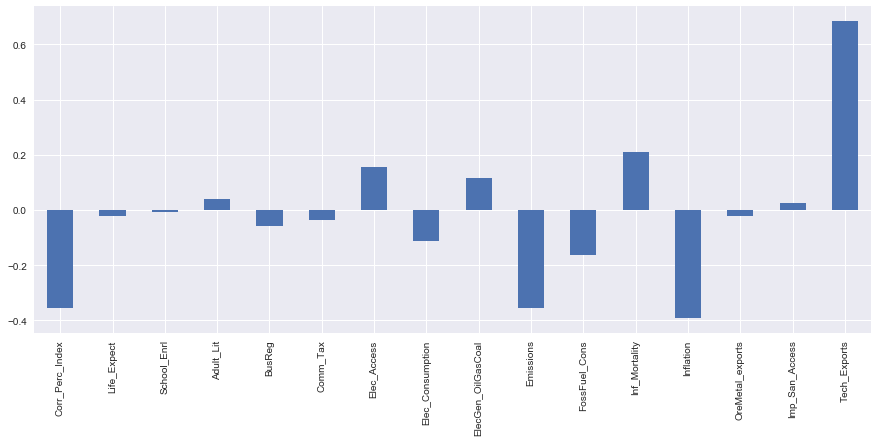

In [69]:
# Plot our third principal component weights
pcaDF[1].plot(kind='bar', figsize=(15,6))

### Principal Component 3
Principal component 3 is made up of primarily:
* 
* Emissions
* Electricity Generation for oil, gas and coal
* Infant Mortality
* School Enrollment

Component determined to be:
Low electricity generation from traditional methods, with high pollution (Co2 emissions) and infant mortality

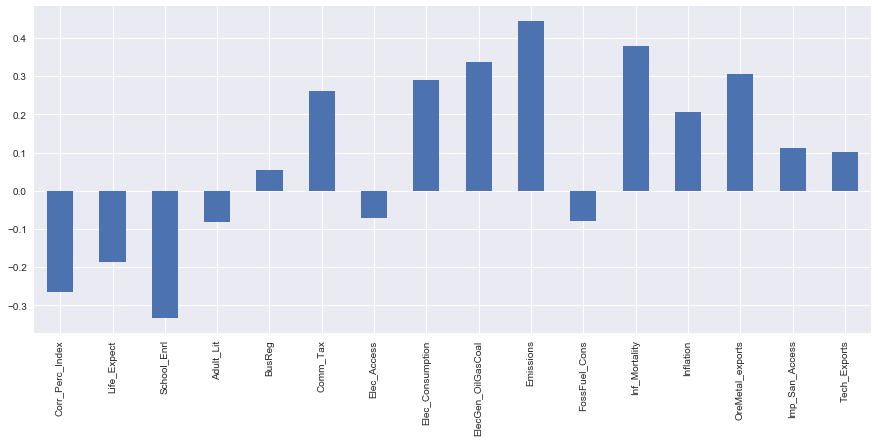

In [79]:
# Plot our third principal component weights
pcaDF[2].plot(kind='bar', figsize=(15,6))

## PCA Transform our data

In [80]:
# Transform our training set to its principal components
pcaX_train = pca.transform(X_train)

# Transform our testing set to its principal components
pcaX_test = pca.transform(X_test)

# Transform the principal components to a data frame
pcaX_train = pd.DataFrame(pcaX_train)

# Transform the principal components to a data frame
pcaX_test = pd.DataFrame(pcaX_test)

### Post-PCA Heatmap Insight
We can see from the heatmaps plotted below, that through the use of PCA, we are able to reduce the multicollinearity that is present within our data. 

We hope that this reduction in multicollinearity will improve our model, and allow us to improve our model score.

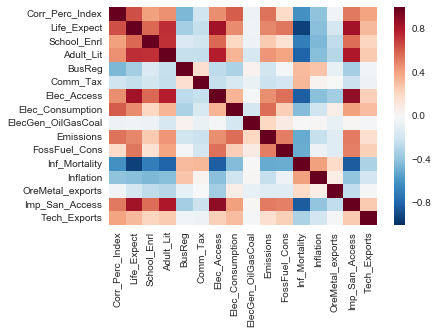

In [81]:
# Plot heatmap of X_train before PCA
sns.heatmap(X_train.corr())

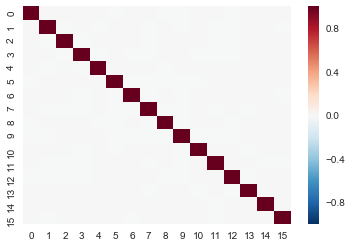

In [82]:
# plot heatmap of X_train post-PCA
sns.heatmap(pcaX_train.corr())

In [83]:
# Print shapes of training and test sets pre and post PCA to ensure rows are same
# Print shape of X_train and post-pca training set
print(len(pcaX_train))
print(X_train.shape)

# Print shape of X_train and post-pca training set
print(len(pcaX_test))
print(X_test.shape)

126
(126, 16)
42
(42, 16)


## Fitting our model to our PCA Data

In [123]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

# Instantiate a number of models
model1 = LinearRegression()
model2 = Lasso()
model3 = Ridge(alpha=0.1)
model4 = ElasticNet(random_state=47)
model5 = RandomForestRegressor(random_state=47)
model6 = BaggingRegressor(max_samples= 0.6, n_estimators= 11, random_state=47)
model7 = GradientBoostingRegressor(random_state=47)
model8 = KNeighborsRegressor(leaf_size= 20, n_neighbors= 4, p= 1)


## PCA component tester
Below we will fit and score our models using different feature ranges of components 
This is to determine the best performing feature set

In [124]:
for i in range(1,17):
    print('iteration: {}'.format(i))

    model1.fit(pcaX_train.iloc[:,:i], y_train)
    model2.fit(pcaX_train.iloc[:,:i], y_train)
    model3.fit(pcaX_train.iloc[:,:i], y_train)
    model4.fit(pcaX_train.iloc[:,:i], y_train)
    model5.fit(pcaX_train.iloc[:,:i], y_train)
    model6.fit(pcaX_train.iloc[:,:i], y_train)
    model7.fit(pcaX_train.iloc[:,:i], y_train)
    model8.fit(pcaX_train.iloc[:,:i], y_train)


    # Print initial PCA scores of our models (Only first 3 principal components)
    print('Linear Reg: {}\nRMSE: {}\n'.format(model1.score(pcaX_test.iloc[:,:i], y_test), 
                                            np.sqrt(mean_squared_error(y_test, model1.predict(pcaX_test.iloc[:,:i])))))
    print('Lasso: {}\nRMSE: {}\n'.format(model2.score(pcaX_test.iloc[:,:i], y_test), 
                                            np.sqrt(mean_squared_error(y_test, model2.predict(pcaX_test.iloc[:,:i])))))
    print('Ridge: {}\nRMSE: {}\n'.format(model3.score(pcaX_test.iloc[:,:i], y_test), 
                                            np.sqrt(mean_squared_error(y_test, model3.predict(pcaX_test.iloc[:,:i])))))
    print('ElasticNet: {}\nRMSE: {}\n'.format(model4.score(pcaX_test.iloc[:,:i], y_test), 
                                            np.sqrt(mean_squared_error(y_test, model4.predict(pcaX_test.iloc[:,:i])))))
    print('Rand Forest: {}\nRMSE: {}\n'.format(model5.score(pcaX_test.iloc[:,:i], y_test), 
                                            np.sqrt(mean_squared_error(y_test, model5.predict(pcaX_test.iloc[:,:i])))))
    print('Bagging: {}\nRMSE: {}\n'.format(model6.score(pcaX_test.iloc[:,:i], y_test), 
                                            np.sqrt(mean_squared_error(y_test, model6.predict(pcaX_test.iloc[:,:i])))))
    print('Gradient Boost: {}\nRMSE: {}\n'.format(model7.score(pcaX_test.iloc[:,:i], y_test), 
                                            np.sqrt(mean_squared_error(y_test, model7.predict(pcaX_test.iloc[:,:i])))))
    print('KNN: {}\nRMSE: {}\n'.format(model8.score(pcaX_test.iloc[:,:i], y_test), 
                                            np.sqrt(mean_squared_error(y_test, model8.predict(pcaX_test.iloc[:,:i])))))
    

iteration: 1
Linear Reg: 0.368544043043
RMSE: 20028.461011

Lasso: 0.368534179015
RMSE: 20028.6174435

Ridge: 0.368513242496
RMSE: 20028.9494694

ElasticNet: 0.349663678256
RMSE: 20325.6785157

Rand Forest: 0.685025897281
RMSE: 14145.3426072

Bagging: 0.712233471715
RMSE: 13520.6068838

Gradient Boost: 0.680100909068
RMSE: 14255.5031371

KNN: 0.753797425332
RMSE: 12506.1128188

iteration: 2
Linear Reg: 0.523974729975
RMSE: 17389.6584082

Lasso: 0.52395588167
RMSE: 17390.0026781

Ridge: 0.523902773417
RMSE: 17390.9726794

ElasticNet: 0.481155607028
RMSE: 18154.9313456

Rand Forest: 0.707876029265
RMSE: 13622.5887084

Bagging: 0.702582636737
RMSE: 13745.4577288

Gradient Boost: 0.708343237505
RMSE: 13611.690711

KNN: 0.672134057292
RMSE: 14431.9229057

iteration: 3
Linear Reg: 0.546839454553
RMSE: 16966.8840714

Lasso: 0.546813026528
RMSE: 16967.3788129

Ridge: 0.546751560402
RMSE: 16968.5294237

ElasticNet: 0.496995683551
RMSE: 17875.6524811

Rand Forest: 0.706809400015
RMSE: 13647.4360

In [125]:
# Original PCA Score @ 10 components
model5.fit(pcaX_train.iloc[:,:10], y_train)
model7.fit(pcaX_train.iloc[:,:10], y_train)

scoreRF = model5.score(pcaX_test.iloc[:,:10], y_test)
rmseRF = np.sqrt(mean_squared_error(y_test, model5.predict(pcaX_test.iloc[:,:10])))

scoreGB = model7.score(pcaX_test.iloc[:,:10], y_test)
rmseGB = np.sqrt(mean_squared_error(y_test, model7.predict(pcaX_test.iloc[:,:10])))
               
print('Random Forest \nScore: {}\n RMSE: {}'.format(scoreRF,rmseRF))
print('Gradient Boost \nScore: {}\n RMSE: {}'.format(scoreGB,rmseGB))

Random Forest 
Score: 0.780202400824
 RMSE: 11816.4635384
Gradient Boost 
Score: 0.755540663721
 RMSE: 12461.7593753


In [122]:
# Optimized Gridsearch Score
model5.fit(pcaX_train.iloc[:,:10], y_train)
model7.fit(pcaX_train.iloc[:,:10], y_train)

scoreRF = model5.score(pcaX_test.iloc[:,:10], y_test)
rmseRF = np.sqrt(mean_squared_error(y_test, model5.predict(pcaX_test.iloc[:,:10])))

scoreGB = model7.score(pcaX_test.iloc[:,:10], y_test)
rmseGB = np.sqrt(mean_squared_error(y_test, model7.predict(pcaX_test.iloc[:,:10])))
               
print('Random Forest \nScore: {}\n RMSE: {}'.format(scoreRF,rmseRF))
print('Gradient Boost \nScore: {}\n RMSE: {}'.format(scoreGB,rmseGB))

Random Forest 
Score: 0.681802818489
 RMSE: 14217.5318977
Gradient Boost 
Score: 0.755540663721
 RMSE: 12461.7593753


In [94]:
from sklearn.model_selection import cross_val_score

print('Random Forest Cross-Val Score: {}'.format(cross_val_score(model5, pcaX_test.iloc[:,:10], y_test)))
print('Gradient Boost Cross-Val Score: {}'.format(cross_val_score(model7, pcaX_test.iloc[:,:10], y_test)))

Random Forest Cross-Val Score: [ 0.69154268  0.8733151   0.73500827]
Gradient Boost Cross-Val Score: [ 0.67390463  0.91096246  0.93305195]


### Assessment
It appears that we have improved our Random Forest and Gradient Boost models with PCA using an optimal amount of 10 components.  

The Random Forest model achieves a more stable cross validated score than our Gradient Boost model, with less Root mean squared error.

Their scores can be seen above.

# GridSearch
We use the below Gridsearch to improve our models and input the best recommended parameters above

In [117]:
from sklearn.model_selection import GridSearchCV
params = {
    # Bagging
#     'n_estimators': [5,6,7,8,9,10,11,12,13,14,15,16,17,18],
#     'max_samples': [0.2,0.4,0.6,0.8,1]
    
    # KNN
#     'n_neighbors': [2,3,4,5,6,7,8,9,10],
#     'leaf_size': [20,25,30,35],
#     'p': [1,2]
    
    # ElasticNet
#     'alpha': [0.2,0.4,0.6,0.8],
#     'l1_ratio': [0.2,0.4,0.5,0.6,0.8]
    
    # Random Forest
    'n_estimators': [5,6,7,8,9,10,11,12,13,14,15,16,17,18],
    'min_samples_split': [0.2,0.4,0.6,0.8],
    'min_impurity_decrease': [0.2,0.4,0.6,0.8],
    'max_depth': [None, 1,2,4,5,6,8,10,12,15,18,20],
    'min_weight_fraction_leaf': [0,0.1, 0.2, 0.3, 0.4, 0.5]
    
    # Gradient Booster
    
#     'loss': ['ls', 'lad', 'huber', 'quantile'],
#     'learning_rate': [0.1,0.2,0.3,0.4,0.5],
#     'n_estimators': [100,120,150,180],
#     'max_depth': [3,5,6,7,8,10],
#     'min_samples_split': [0.2,0.4,0.6,0.8]
}

gsearch = GridSearchCV(model5, param_grid=params, n_jobs=-1)

In [118]:
gsearch.fit(pcaX_train.iloc[:,:10], y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=47, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18], 'min_samples_split': [0.2, 0.4, 0.6, 0.8], 'min_weight_fraction_leaf': [0, 0.1, 0.2, 0.3, 0.4, 0.5], 'min_impurity_decrease': [0.2, 0.4, 0.6, 0.8], 'max_depth': [None, 1, 2, 4, 5, 6, 8, 10, 12, 15, 18, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [119]:
gsearch.best_params_

{'max_depth': None,
 'min_impurity_decrease': 0.2,
 'min_samples_split': 0.2,
 'min_weight_fraction_leaf': 0.1,
 'n_estimators': 7}

# Using TPOT to build a pipeline
We will use the TPOT python package to build a pipeline to automate the modelling process and produce an efficient model to use as a form of comparison to the model we have built above. 

In [95]:
# Subset dataframe to indicator values excluding GDP_Total and GDP_perCap
X = df.iloc[:,6:]

target = df['GDP_perCap']

In [96]:
from sklearn.model_selection import train_test_split

# Split our training and test set into their respective parts
X_train, X_test, y_train, y_test = train_test_split(X, target, random_state=46)

# Zscore or training and testing features
X_train = X_train.apply(zscore)
X_test = X_test.apply(zscore)

In [97]:
X_train.head()

,Corr_Perc_Index,Life_Expect,School_Enrl,Adult_Lit,BusReg,Comm_Tax,Elec_Access,Elec_Consumption,ElecGen_OilGasCoal,Emissions,FossFuel_Cons,Inf_Mortality,Inflation,OreMetal_exports,Imp_San_Access,Tech_Exports
132,2.462510,1.278191,0.373081,0.595075,-1.595868,-0.767272,0.650813,0.970707,1.015351,0.564008,1.192894,-1.007483,-0.580400,-0.530482,0.953965,4.055512
162,-0.693708,0.533229,0.271279,0.457803,0.375353,-0.230338,0.559528,-0.430411,-0.073513,-0.545155,0.277933,-0.265809,0.510081,-0.567166,-0.106262,0.442385
0,-1.156686,-2.297099,-2.554438,-0.860955,0.230410,0.156327,-1.581567,-0.574156,-1.094006,-0.602767,-0.442852,3.491879,1.301130,-0.466798,-0.938025,-0.571880
87,1.167510,0.455280,0.578202,0.418242,-1.045086,-0.368852,0.485193,-0.497798,0.843514,-0.404393,-1.587214,-0.513543,-0.503852,-0.330347,0.546356,0.272563
148,-1.038489,-0.244070,-0.849777,0.788782,0.056479,1.051559,0.627863,-0.268523,-2.043910,-0.750884,-0.429018,0.800443,0.421976,-0.114754,0.732501,-0.374958


In [98]:
from tpot import TPOTRegressor

# Instantiate the TPOT Regressor pipeline optimizer object with parameters
pipeline_optimizer = TPOTRegressor(generations=1000, population_size=100, cv=5, verbosity=2,
                                  warm_start=True, n_jobs=-1)

/Users/d/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [ ]:
# Fit the Optimizer to our training set
pipeline_optimizer.fit(X_train, y_train)

In [ ]:
# Print the result of the final pipeline on our testing set
print(pipeline_optimizer.score(X_test, y_test))

In [ ]:
# Exporting the optimized pipeline
pipeline_optimizer.export('./tpot_exported_pipelineFinal.py')

## Best TPOT Model
Below is a TPOT determined model that performs well

In [99]:
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectFromModel, VarianceThreshold
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline, make_union
from sklearn.svm import LinearSVR
from tpot.builtins import StackingEstimator

exported_pipeline = make_pipeline(
    VarianceThreshold(threshold=0.3),
    StackingEstimator(estimator=RidgeCV()),
    StackingEstimator(estimator=ExtraTreesRegressor(bootstrap=False, max_features=0.75, min_samples_leaf=20, min_samples_split=5, n_estimators=100)),
    StackingEstimator(estimator=LinearSVR(C=0.1, dual=True, epsilon=0.1, loss="epsilon_insensitive", tol=0.001)),
    StackingEstimator(estimator=KNeighborsRegressor(n_neighbors=22, p=1, weights="uniform")),
    StackingEstimator(estimator=KNeighborsRegressor(n_neighbors=4, p=1, weights="uniform")),
    SelectFromModel(estimator=ExtraTreesRegressor(max_features=1.0, n_estimators=100), threshold=0.2),
    ExtraTreesRegressor(bootstrap=False, max_features=1.0, min_samples_leaf=2, min_samples_split=3, n_estimators=100)
)

# Fit the pipeline to our training data
exported_pipeline.fit(X_train, y_train)

# Use our model to predict and store: y_pred
y_pred = exported_pipeline.predict(X_test)

In [105]:
from sklearn.model_selection import cross_val_score
# Print Score and cross val score
print(exported_pipeline.score(X_test, y_test))
print(cross_val_score(exported_pipeline, X_test, y_test).mean())

0.756598507472
0.706924851393


In [106]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_test, y_pred))

12434.767388401011

# Conclusion
Our best models (without PCA) are:
    * Random Forest (Best performance was when given all 16 features @71.29%)
    * KNN (Best performance with all 16 features @72.36%)
    
Our best models (with PCA) are:
    * Random Forest (Best performance was when given 10 primary components @78.02%)
    
Our best model from TPOT:
    * StackingEstimator @ 75.65%
    
We have not had much success feature elimination to increase our scores. What we can possibly determine from this, is that GDP per capita is a complicated target for prediction that relies on a lot of different features in order to accurately make future predictions. A reduction in the dimension of the model's predictors, results in less accurate / more varied results. 

PCA was able to solve this and focus on the elements of features that can explain the variance within the model and lump them together. With this, we were able to reduce our feature list to 10 and improve our model result using a Random Forest model. When attempting to improve our Random Forest Model, we actually found GridSearch resulted in a less overall score.

We used TPOT to attempt to build a model pipeline for our data, in the hopes it will result in improved performance. However, we were only able to achieve 75.65% accuracy with a lower RMSE score than our PCA Random Forest model

## Assessing our models

Using our top three models, we can look at weightings/coefficients to learn which predictors are potentially more significant in predicting GDP per capita. This could provide us interesting insight that is potentially applicable to real world situations.

For our initial non-PCA models, the predictors that were used were Electricity Consumption, Emissions and Corruption Perception Index as the most significant.  

For our PCA model, we will only focus on features that have an association with a component of approximately 0.4.  If it is lower, we will assume that the factor is not significant enough. When setting this threshold, predictors deemed significant were fossil fuel consumption, inflation, life expectancy, tech exports, emissions, and electricity generation from oil/gas/coal. 

Fossil fuel consumption was negatively related to GDP per capita, with efficiency in consumption being more likely present with high levels. Similarly, electricity generation from traditional methods such as oil/gas/coal was seen as having a negative relationship with increases in GDP. Inflation was represented fairly neutrally, with a strong positive and then strong negative relationship in two separate components. High life expectancy tends to be present with higher GDP per capitas, along with emissions. Tech exports tends to also be an attribute present with higher GDP's.

## Learning and Applications

From the factors that were weighted as significant from our models, we are able to make recommendations as to which factors tend to have more significant relationship/impacts on GDP per capita. Given this information we are able to further anticipate future issues that may arise from increases in GDP per capita.

Electricity Consumption: The strongest predictor, electricity consumption, indicates that high electricity consumption is usually correlated with high GDP per capita. This makes sense, as high GDP indicates high productive output which requires high outputs of electricity. Countries that wish to increase their GDP should look into increasing electric generation to ensure that they have the capacity to accommodate.

Emissions: As expected, an increase in economic output usually translates to increased carbon dioxide emissions. To mitigate the impact of this on your population, investments in clean energy and public transportation could be beneficial.

Corruption Perception Index: The way in which businesses viewed the local government within a country greatly affected whether a country had higher GDP per capita or not. Governments should ensure they are clean when dealing with organizations, as favorability among corporations for a particular country will generally attract other corporations to produce there as well.

Tech Exports: Increased tech exports is usually an attribute of higher GDP per capita countries.  Countries that intend to grow their economic output should invest in their population's knowledge/skills to ensure that they are prepared to produce higher quality technological products, as opposed to raw material and agriculture exports.

Life Expectancy: High life expectancy is associated with higher GDP per capita. As countries aim for higher economic output, they should invest in their health sector to anticipate caring for a population that lives longer. As people live longer, countries may need to also invest in training to ensure that their aging population is prepared to work for longer.  If population growth becomes an issue, potential investments in family planning campaigns or contraception may need to be established.

Fossil Fuel Consumption: High fossil fuel consumption was negatively related to increases in GDP per capita. Efficiencies in this area or reductions in reliance on fossil fuels, generally tends to be related to increased GDP per capita.

Electricity Generation from Oil/Coal/Gas: The weightings indicate that traditional electricity generation is negatively related with GDP per capita increases. As electric output/generation needs to be high to provide capacity for production, countries should invest in clean energy.

Inflation: Definitely a factor, however, due to inconsistencies in representation among components, it would appear that a 'sweet' spot for inflation is best. Too high is bad, too low is bad.